In [ ]:
'''
https://www.sitepoint.com/keras-digit-recognition-tutorial/
https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

'''

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4


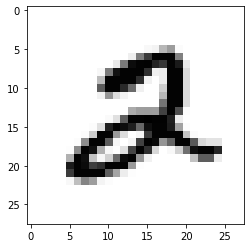

In [3]:
import matplotlib.pyplot as plt
print(y_train[2])
plt.imshow(X_train[5], cmap='Greys')

In [113]:
print(X_train.shape)
print(X_test.shape)
'''
(60000, 28, 28) - 60,000 datapoints and each is 28x28 pixels
(10000, 28, 28)
'''

(60000, 28, 28)
(10000, 28, 28)


'\n(60000, 28, 28) - 60,000 datapoints and each is 28x28 pixels\n(10000, 28, 28)\n'

In [114]:
#keras needs each image to be formatted like (M x N x 1)
'''
Next, we need to reshape our dataset inputs (X_train and X_test) to the shape 
that our model expects when we train the model. The first number is the number
of images (60,000 for X_train and 10,000 for X_test). Then comes the shape of 
each image (28x28). The last number is 1, which signifies that the images are greyscale.
'''
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#normalize image data
X_train = X_train/255
X_test = X_test/255

In [115]:
# make dummies
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)

(60000, 10)


In [99]:
#cretae the NN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential() #create model obj

#add layers
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#to avoid overfitting, neurons and their connections are randomly dropped during training
model.add(Dropout(0.25)) #25% of the neurons are dropped
#flattening layer which converts previoud hidden layer into a 1D array
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
    #softmax is used when the data is going to be classified into a number of predecided classes
model.add(Dense(numDigits, activation='softmax')) 


In [100]:
#Specify a loss function, an optimizer function, and a metric to assess model performance
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
#train the model
    #batch size is the # of samples that will go through the NN at a time
batch_size = 128
    #epochs are the number of times the entire dataset is passed forward and backward through the NN
epochs = 10

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                    verbose=1, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
model.save("digit_recognizer_model.h5")
'''
Test loss:  0.029256155714392662
Test accuracy:  0.9916999936103821
'''

Epoch 1/10
469/469 [==============================] - 48s 101ms/step - loss: 0.2362 - accuracy: 0.9286 - val_loss: 0.0498 - val_accuracy: 0.9849
Epoch 2/10
469/469 [==============================] - 49s 105ms/step - loss: 0.0838 - accuracy: 0.9751 - val_loss: 0.0398 - val_accuracy: 0.9876
Epoch 3/10
469/469 [==============================] - 48s 102ms/step - loss: 0.0633 - accuracy: 0.9808 - val_loss: 0.0346 - val_accuracy: 0.9895
Epoch 4/10
469/469 [==============================] - 46s 99ms/step - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.0315 - val_accuracy: 0.9896
Epoch 5/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0467 - accuracy: 0.9855 - val_loss: 0.0294 - val_accuracy: 0.9911
Epoch 6/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0374 - accuracy: 0.9880 - val_loss: 0.0274 - val_accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0340 - accuracy: 0.9891 - val_loss: 0.0292 - val_accura

# Experimentation

In [118]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model2 = Sequential() #create model obj
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(10, activation='softmax')) #output layer needs 10 nodes becasue 10 possible values (0-9)

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 128
epochs = 3
model2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                    verbose=1, validation_data=(X_test, y_test))
score = model2.evaluate(X_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
#.980300

Epoch 1/3
469/469 [==============================] - 56s 118ms/step - loss: 0.1911 - accuracy: 0.9449 - val_loss: 0.0606 - val_accuracy: 0.9825
Epoch 2/3
469/469 [==============================] - 50s 107ms/step - loss: 0.0594 - accuracy: 0.9818 - val_loss: 0.0526 - val_accuracy: 0.9821
Epoch 3/3
469/469 [==============================] - 53s 113ms/step - loss: 0.0423 - accuracy: 0.9872 - val_loss: 0.0450 - val_accuracy: 0.9842
Test loss:  0.04500932991504669
Test accuracy:  0.9842000007629395


In [119]:
print(model2.predict(X_test[:5]))
print(y_test[:5])

[[1.3967463e-10 6.2563774e-11 7.1414078e-08 1.2779966e-06 6.3699701e-12
  3.9764393e-11 1.4785572e-17 9.9999642e-01 7.6988318e-09 2.0932166e-06]
 [3.9160337e-08 2.4013059e-07 9.9999774e-01 5.5104419e-09 2.5800515e-14
  3.4745090e-10 2.0078314e-06 1.0946730e-15 1.5166405e-08 9.0706671e-14]
 [5.2220889e-07 9.9912149e-01 4.3478834e-05 1.5230291e-06 1.9862209e-04
  8.9471951e-07 1.2195417e-06 3.9125560e-04 2.4016046e-04 8.3304661e-07]
 [9.9995983e-01 2.8098074e-10 1.9047553e-06 2.4124146e-08 1.6609349e-07
  7.8244433e-08 2.7926531e-05 2.2500037e-06 7.6621212e-08 7.8096309e-06]
 [4.1265751e-09 1.1455385e-10 7.2430650e-10 5.4029242e-10 9.9997950e-01
  1.2715740e-12 2.0860307e-10 4.1227302e-08 4.0939252e-08 2.0484038e-05]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
